In [1]:
from silica_prediction import SilicaPrediction
import shutil
from pathlib import Path
import kagglehub

In [2]:
source_path = Path(
    kagglehub.dataset_download(
        "edumagalhaes/quality-prediction-in-a-mining-process"
    )
)

data_dir = Path("data")
data_dir.mkdir(exist_ok=True)

print("📥 Dataset baixado em:", source_path)

for file in source_path.iterdir():
    destination = data_dir / file.name
    
    if destination.exists():
        print(f"⚠️ {file.name} já existe em data/. Pulando...")
    else:
        shutil.move(str(file), destination)
        print(f"✅ Movido: {file.name}")

📥 Dataset baixado em: C:\Users\vmbarbosa\.cache\kagglehub\datasets\edumagalhaes\quality-prediction-in-a-mining-process\versions\1


In [3]:
silica_prediction = SilicaPrediction("data/MiningProcess_Flotation_Plant_Database.csv")

Treinando modelo: Full Data
Carregando dados...
Pré-processando dados...
Start Date: 2017-03-10 01:00:00, Split Date: 2017-08-06 21:00:00, End Date: 2017-09-09 23:00:00
Treinando modelo...
R-squared score: 0.6476404666900635
Modelo Avaliado com todas as features:
- RMSE (Erro Quadrático Médio): 0.6106
- Desvio Padrão do Alvo: 1.0286
- Razão RMSE / Desvio Padrão do Alvo: 0.59
  -> Bom: O erro é comparável à variabilidade dos dados.
- Ganho em relação ao baseline: 40.67%
  -> Bom: O modelo é razoavelmente melhor que o baseline.


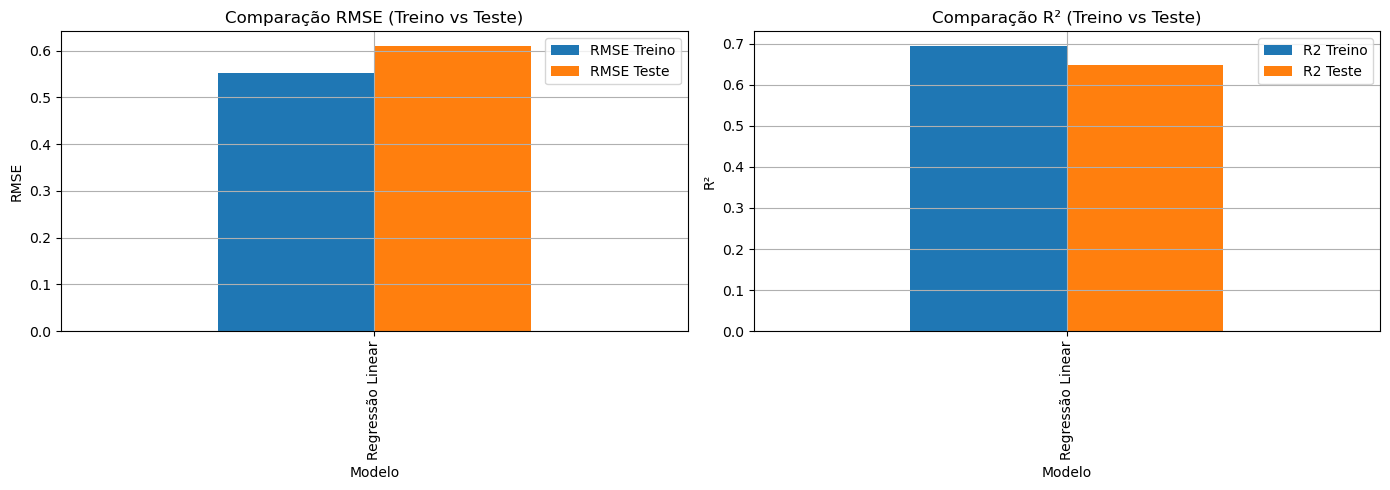


Diagnóstico de Overfitting / Underfitting
- Regressão Linear: Bom ajuste

Recomendação de Modelos Não-Lineares
- Regressão Linear: R² < 0.7 → vale testar RandomForest ou XGBoost


In [4]:
print("="*50)
print("Treinando modelo: Full Data")
print("="*50)
model, rmse, y_pred = silica_prediction.pipeline_lr(fi=0, cd=False)


Treinando modelo: Considerando a remoção de colunas


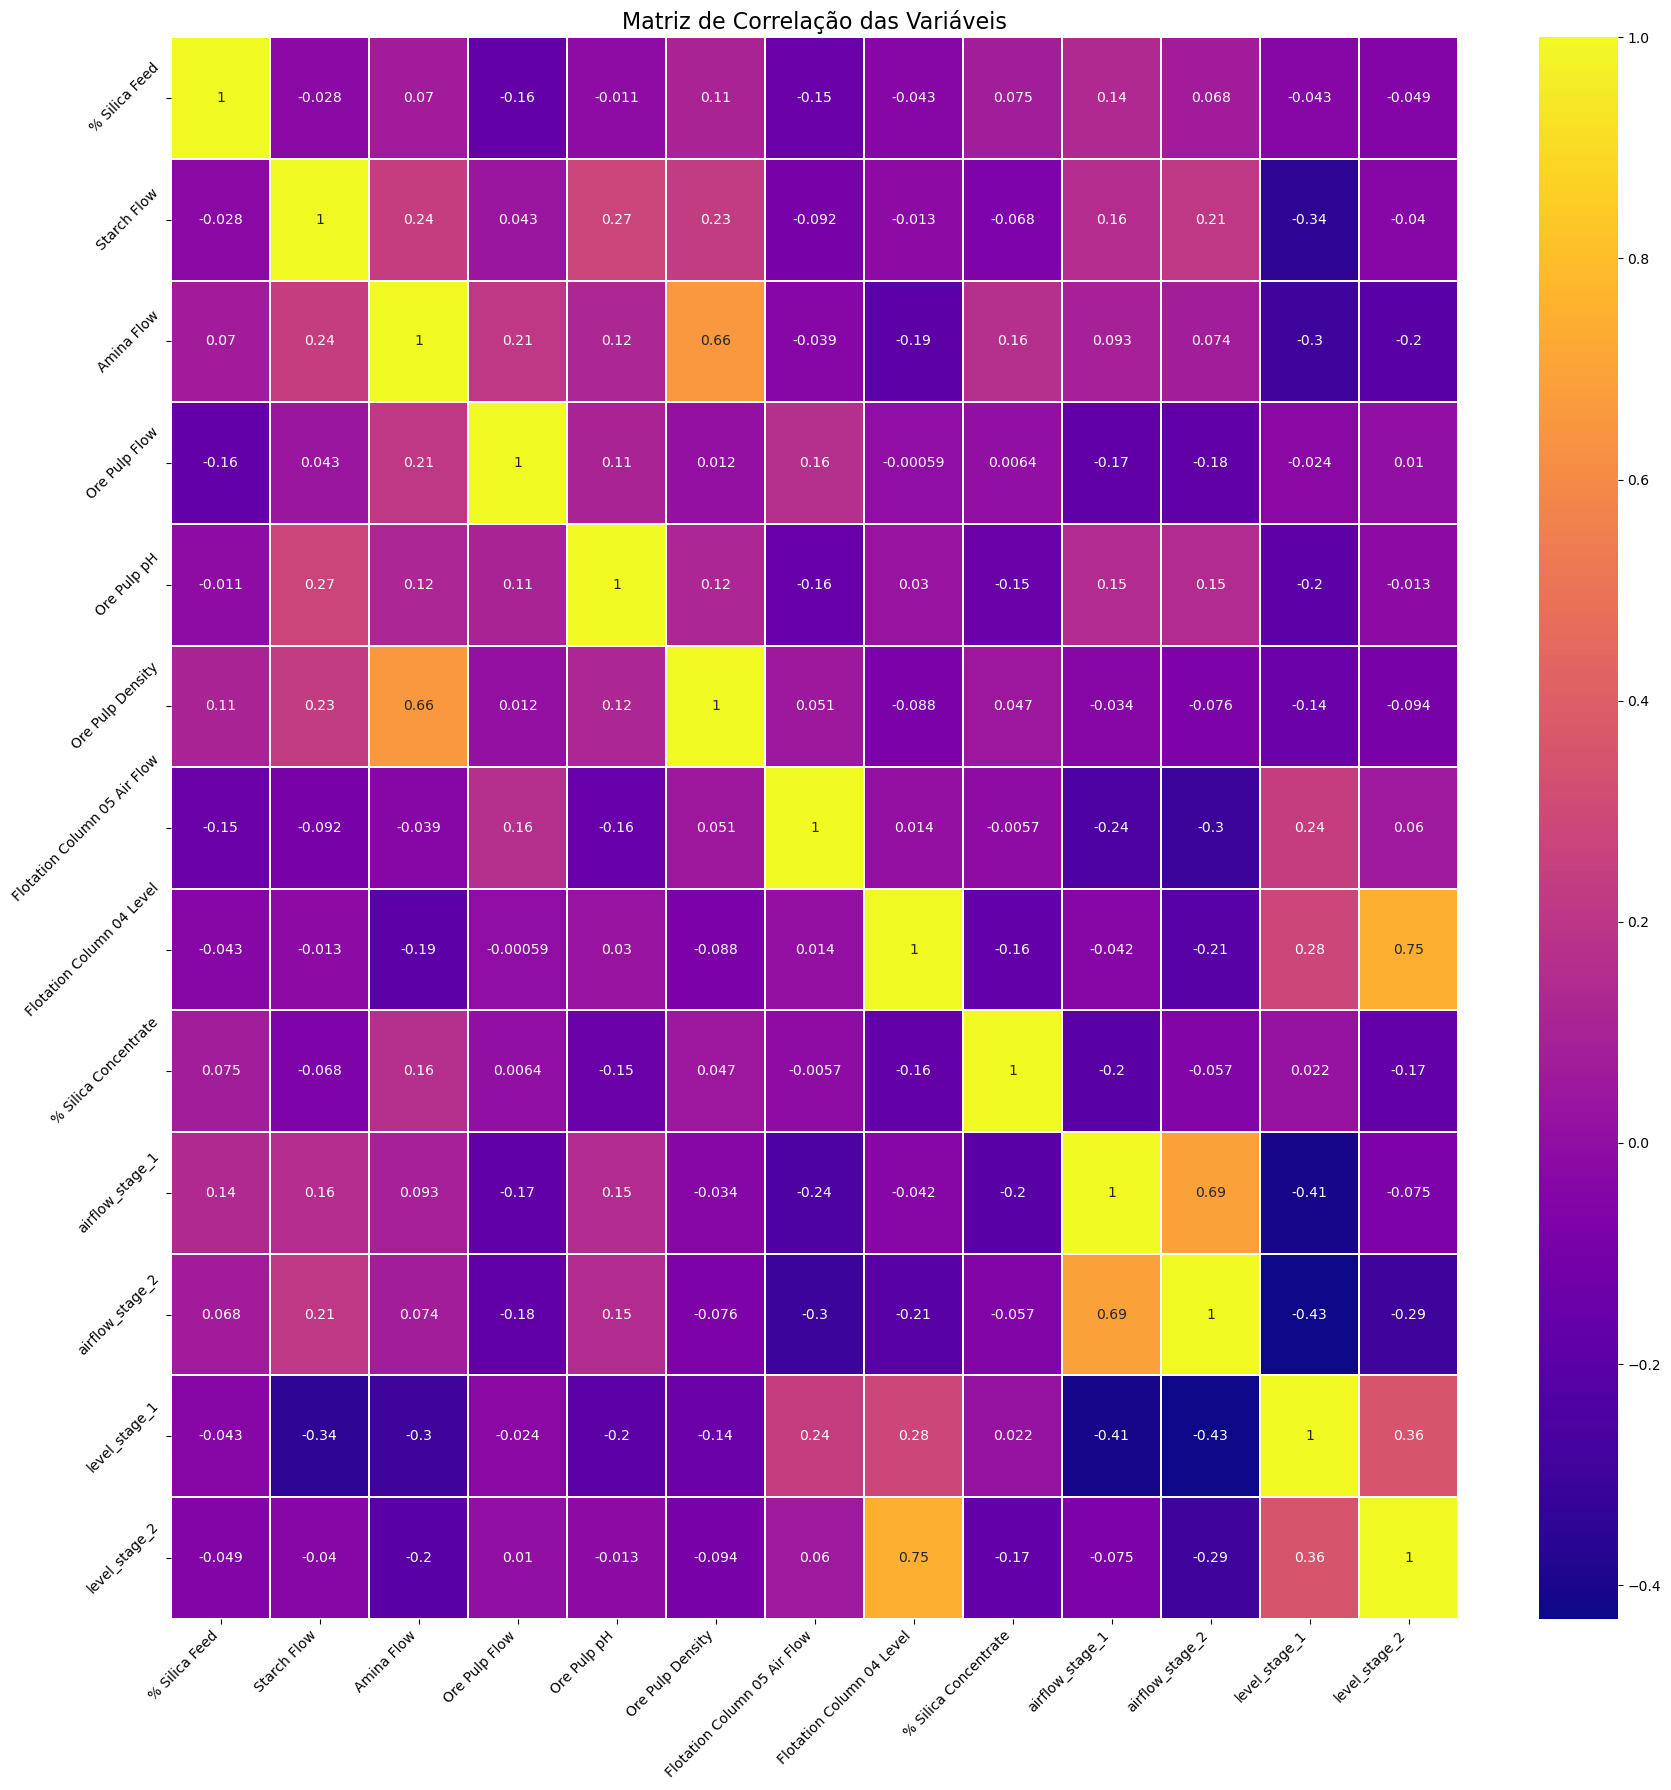

Carregando dados...
Pré-processando dados...
Start Date: 2017-03-10 01:00:00, Split Date: 2017-08-06 21:00:00, End Date: 2017-09-09 23:00:00
Treinando modelo...
R-squared score: 0.1809922456741333
Modelo Avaliado com todas as features:
- RMSE (Erro Quadrático Médio): 0.9308
- Desvio Padrão do Alvo: 1.0286
- Razão RMSE / Desvio Padrão do Alvo: 0.90
  -> Bom: O erro é comparável à variabilidade dos dados.
- Ganho em relação ao baseline: 9.54%
  -> Marginal: O modelo é apenas ligeiramente melhor que o baseline.


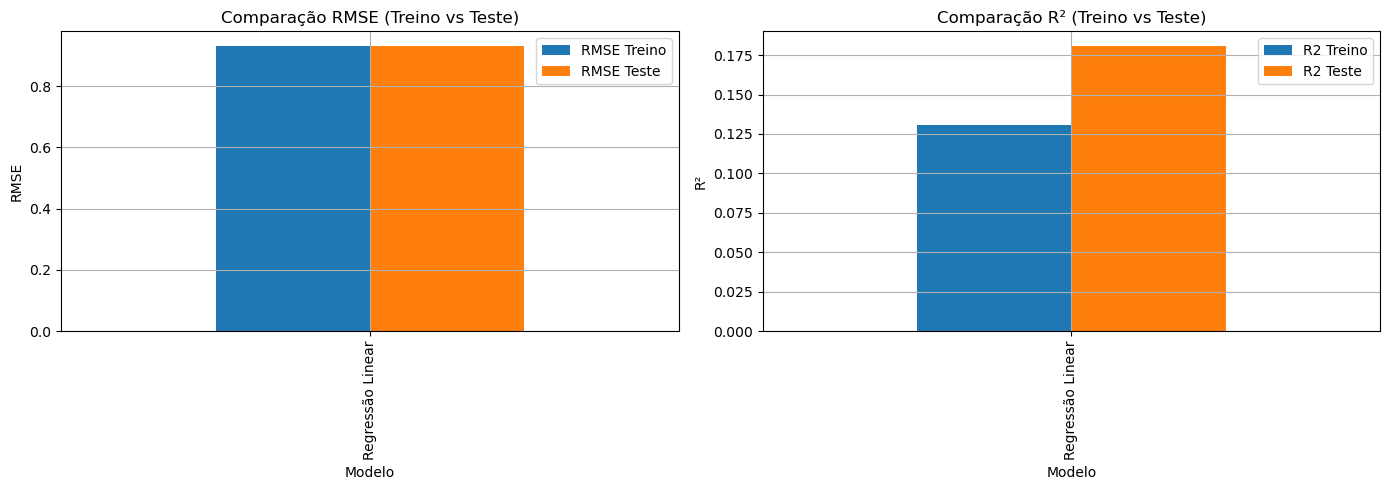


Diagnóstico de Overfitting / Underfitting
- Regressão Linear: Underfitting

Recomendação de Modelos Não-Lineares
- Regressão Linear: R² < 0.7 → vale testar RandomForest ou XGBoost


In [5]:
print("\n" + "="*50)
print("Treinando modelo: Considerando a remoção de colunas")
print("="*50)
silica_prediction.plot_correlation_heatmap(silica_prediction.load_data(clean_data=True), save_path="data/correlation_heatmap.png")
model_top, rmse_top, y_pred_top = silica_prediction.pipeline_lr(cd=True)


Treinando modelo: Considerando feature importance
Carregando dados...
Pré-processando dados...
Start Date: 2017-03-10 01:00:00, Split Date: 2017-08-06 21:00:00, End Date: 2017-09-09 23:00:00
Treinando modelo...
R-squared score: 0.6476404666900635
R-squared score: 0.6476404666900635


c:\Users\vmbarbosa\Desktop\Vitor\Stefanini\Silica_Prediction\silica_prediction.py:296: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feature_importances, palette='plasma')


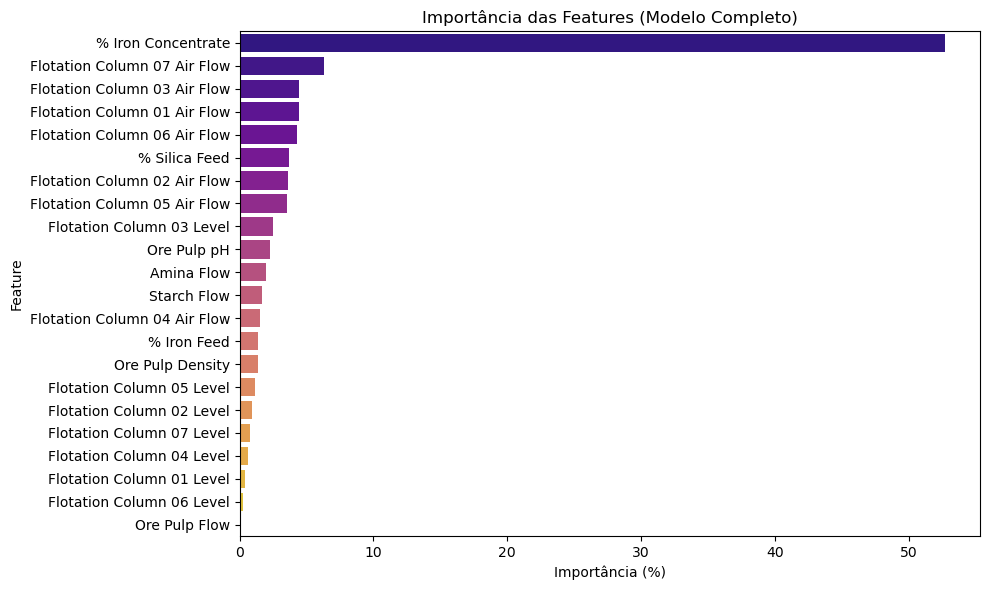

Recalculando o modelo com as 10 features mais importantes...
R-squared score: 0.6435781717300415
Modelo Avaliado com 10 features:
- RMSE (Erro Quadrático Médio): 0.6141
- Desvio Padrão do Alvo: 1.0286
- Razão RMSE / Desvio Padrão do Alvo: 0.60
  -> Bom: O erro é comparável à variabilidade dos dados.
- Ganho em relação ao baseline: 40.33%
  -> Bom: O modelo é razoavelmente melhor que o baseline.


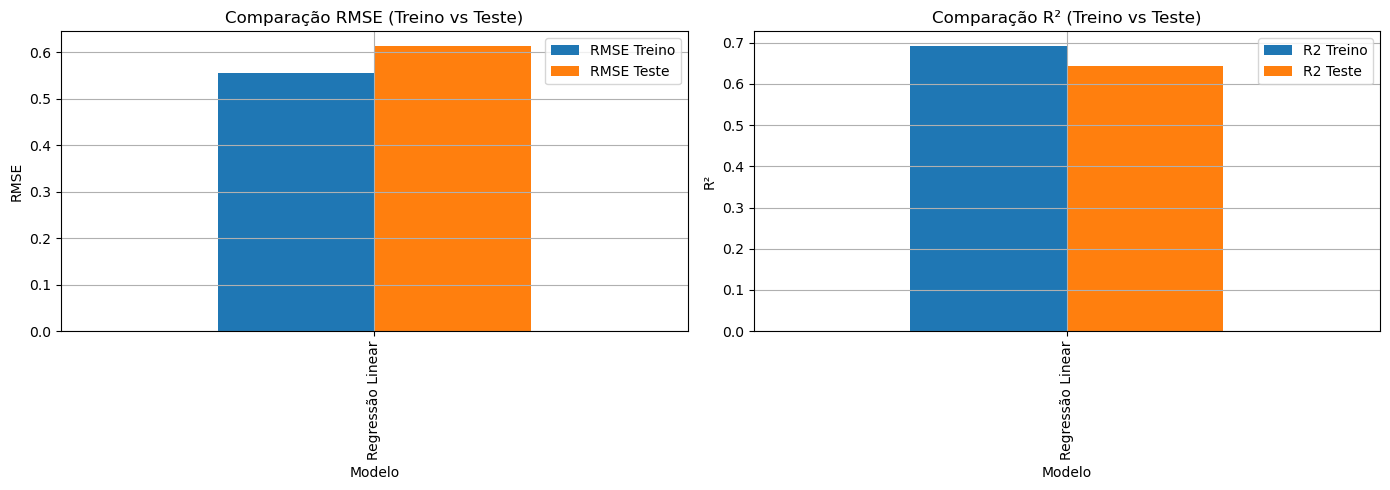


Diagnóstico de Overfitting / Underfitting
- Regressão Linear: Bom ajuste

Recomendação de Modelos Não-Lineares
- Regressão Linear: R² < 0.7 → vale testar RandomForest ou XGBoost


In [6]:
print("\n" + "="*50)
print("Treinando modelo: Considerando feature importance")
print("="*50)
model_top, rmse_top, y_pred_top = silica_prediction.pipeline_lr(fi=10, cd=False)